<a href="https://colab.research.google.com/github/space-data-robert/compet-python-machine/blob/master/regressor-houseprice-ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
import pandas as pd
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

data = pd.read_csv('train.csv')
data.set_index('Id', inplace=True)

print(f'data shape = {data.shape}')
data.head(2)

data shape = (1460, 80)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


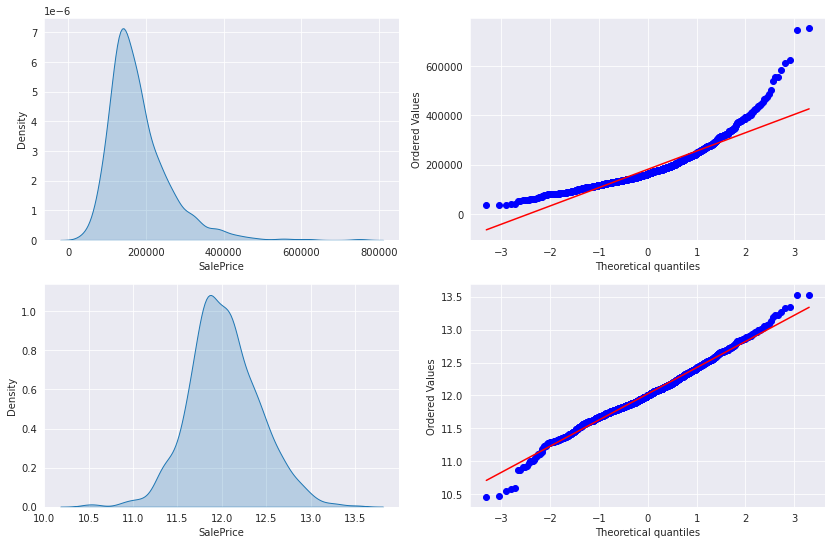

In [ ]:
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(14, 9)

sns.kdeplot(
    data=data, x='SalePrice', shade=True, 
    ax=ax1
)
stats.probplot(
    data.SalePrice, 
    plot=ax2
)
ax2.set(title=None)

def log_scaler(x):
    return np.log1p(x)

# this function is make a pipeline.

data.SalePrice = data.SalePrice.apply(log_scaler)

sns.kdeplot(
    data=data, x='SalePrice', shade=True, 
    ax=ax3
)
stats.probplot(
    data.SalePrice, 
    plot=ax4
)
ax4.set(title=None)

plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

x_data = data.copy()
x_data = pd.get_dummies(
    x_data, dummy_na=True
).dropna(axis=0)

y_data = x_data.pop('SalePrice')

x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data, test_size=0.3, random_state=27
)

print(f'train shape = {x_train.shape}, {y_train.shape}')
x_train.head(2)

train.shape = (784, 331), (784,)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSZoning_nan,Street_Grvl,Street_Pave,Street_nan,Alley_Grvl,Alley_Pave,Alley_nan,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotShape_nan,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LandContour_nan,Utilities_AllPub,Utilities_NoSeWa,Utilities_nan,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LotConfig_nan,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,LandSlope_nan,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Neighborhood_nan,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition1_nan,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Condition2_nan,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BldgType_nan,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,HouseStyle_nan,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofStyle_nan,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofMatl_nan,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior1st_nan,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Exterior2nd_nan,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_nan,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterQual_nan,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,ExterCond_nan,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Foundation_nan,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_nan,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_nan,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_nan,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_nan,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_nan,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Heating_nan,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,HeatingQC_nan,CentralAir_N,CentralAir_Y,CentralAir_nan,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Electrical_nan,KitchenQual_Ex,KitchenQual_Fa,KitchenQ

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(f_regression, k=50)
selector.fit_transform(x_train, y_train)

selected_mask = selector.get_support()
all_feature = x_train.columns

selected_feature = all_feature[selected_mask]

selection = pd.DataFrame(
    [c.split('_') for c in selected_feature], 
    columns=['ImportantFeature', 'ImportantValue']
)
selection.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
ImportantFeature,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MSZoning,MSZoning,LotShape,LotShape,Neighborhood,Exterior1st,Exterior2nd,MasVnrType,MasVnrType,ExterQual,ExterQual,ExterQual,Foundation,Foundation,BsmtQual,BsmtQual,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,HeatingQC,KitchenQual,KitchenQual,KitchenQual,FireplaceQu,FireplaceQu,GarageType,GarageType,GarageFinish,GarageFinish,SaleType,SaleCondition
ImportantValue,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,RL,RM,IR1,Reg,NridgHt,VinylSd,VinylSd,None,Stone,Ex,Gd,TA,CBlock,PConc,Ex,Gd,TA,Gd,GLQ,Ex,TA,Ex,Gd,TA,Gd,nan,Attchd,Detchd,Fin,Unf,New,Partial


In [ ]:
!pip install auto-sklearn

In [ ]:
from autosklearn.regression import AutoSklearnRegressor
from autosklearn.metrics import root_mean_squared_error

minute = 5

automl = AutoSklearnRegressor(
    load_models=True,
    time_left_for_this_task=60*minute,
    resampling_strategy='cv',
    metric=root_mean_squared_error,
    ensemble_size=5,
    memory_limit=10**4,
    seed=27,
)
automl.fit(
    x_train[selected_feature], 
    y_train
)

y_pred = automl.predict(
    x_test[selected_feature]
)
test_score = root_mean_squared_error(
    y_test, y_pred
)
print(f'test score = {-test_score}')

# this score is baseline.

automl.leaderboard()

val score = 0.12952473922726782


,rank,ensemble_weight,type,cost,duration
model_id,,,,,
2,1,0.8,random_forest,0.155424,25.166197
15,2,0.2,ard_regression,0.182434,13.606886


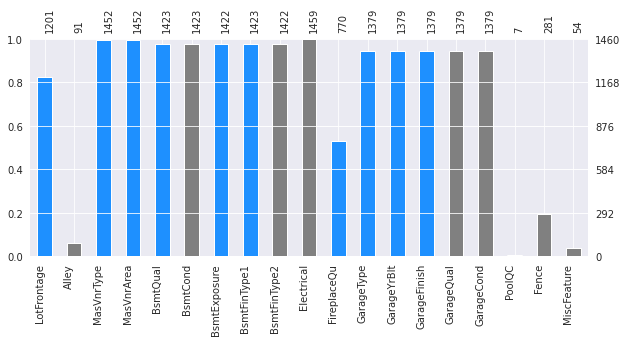

In [ ]:
import missingno as msno

missing_mask = (
    data.isna().sum() != 0
).values

missing_feature = data.columns[missing_mask]

importance_feature = set(
    selection.ImportantFeature
)

importance_mask = ['gray'] * len(importance_feature)

for n, f in enumerate(missing_feature):
    if f not in importance_feature:
        continue
    importance_mask[n] = 'dodgerblue'

msno.bar(
    data[missing_feature],
    figsize=(10, 4), fontsize=10, label_rotation=90,
    color=importance_mask
)
plt.show()

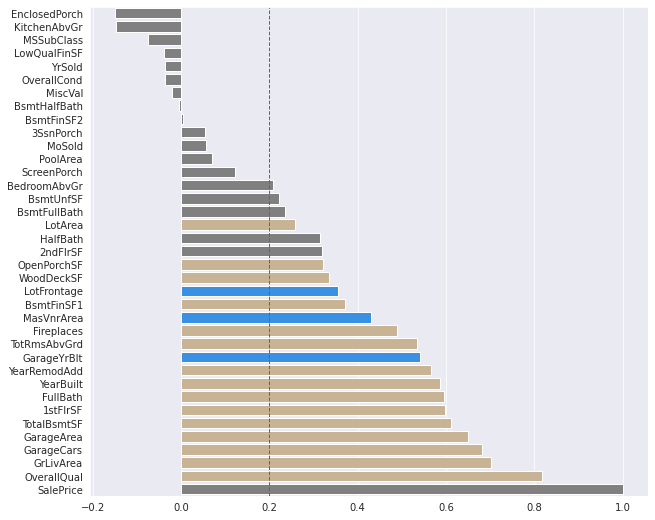

In [ ]:
plt.subplots(figsize=(10, 9))

correlation = data.corr().SalePrice.sort_values()

correlated_missing_mask = [1 if f in missing_feature else 2 for f in correlation.index]
correlated_importance_mask = [3 if f in importance_feature else 1 for f in correlation.index]

correlated_mask = np.multiply(
    correlated_missing_mask,
    correlated_importance_mask
)

correlated_map = {
    1: 'gray',          # this low importance.
    2: 'gray',          #      missing value.
    3: 'dodgerblue',    #      high importance and missing value.
    6: 'tan'            #      high importance and nice.
}
correlated_mask = [correlated_map[f] for f in correlated_mask]

sns.barplot(
    x=correlation.values,
    y=correlation.index,
    orient='h',
    palette=correlated_mask
)
plt.axvline(x=0.2, linewidth=1, linestyle='--')
plt.show()

In [ ]:
# there are feature engineering.

In [ ]:
from scipy.stats import skew # norm

nummer_feature = data.dtypes[data.dtypes != 'object'].index

skewed_feature  = data[nummer_feature].apply(
    lambda x: skew(x.dropna())
).sort_values(ascending=False)

skewness = skewed_feature.to_frame('Skew')

print(f'skewness = {skewness .shape}')
skewness.T

skewness = (37, 1)


,PoolArea,3SsnPorch,LowQualFinSF,MiscVal,KitchenAbvGr,BsmtHalfBath,ScreenPorch,BsmtFinSF2,EnclosedPorch,LotArea,MasVnrArea,HalfBath,BsmtFullBath,MSSubClass,2ndFlrSF,1stFlrSF,Fireplaces,WoodDeckSF,GrLivArea,OpenPorchSF,YrSold,TotRmsAbvGrd,SalePrice,OverallCond,FullBath,LotFrontage,OverallQual,BsmtFinSF1,YearRemodAdd,YearBuilt,GarageYrBlt,MoSold,BedroomAbvGr,GarageCars,BsmtUnfSF,GarageArea,TotalBsmtSF
Skew,14.363418,7.827826,7.593301,5.50553,3.995746,3.943685,3.184431,2.61935,2.160966,0.751948,0.595371,0.575071,0.433189,0.387742,0.310478,0.234374,0.230377,0.216523,0.165801,0.11619,0.095495,0.054002,0.010593,-0.067853,-0.312639,-0.424795,-0.43347,-0.496501,-0.509364,-0.636291,-0.667369,-0.718852,-0.97372,-1.204757,-1.554895,-3.035806,-4.108425


In [ ]:
from scipy.special import boxcox1p

skewness = skewness[abs(skewness) >= 0.75]
skewed_feature = skewness.index

# this function is make a pipeline.

lam = 0.15

for n, f in enumerate(skewed_feature):
    data[f] = boxcox1p(data[f], lam)

print(f'boxcox count = {n}')

boxcox count = 36


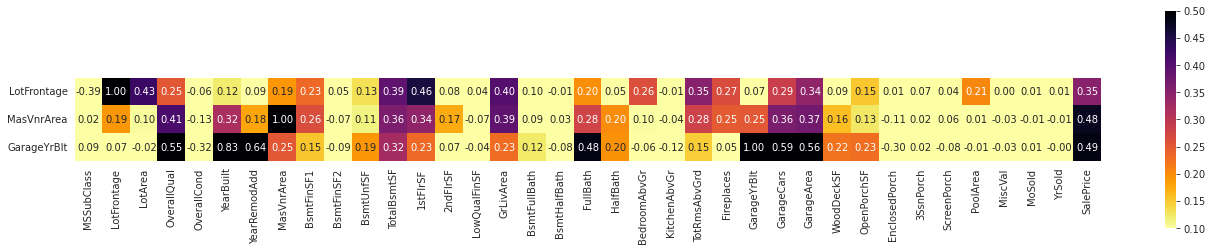

In [ ]:
plt.subplots(figsize=(23, 4))

threshold = len(data) * 0.7

imputed_feature = (
    data[missing_feature].isna().sum()
).to_frame('Isna')

imputed_feature = (
    imputed_feature[imputed_feature.Isna <= threshold]
).index

correlation = data.corr()

sns.heatmap(
    correlation.filter(imputed_feature).T,
    cbar=True, annot=True, square=True, fmt='.2f',
    cmap='inferno_r', vmin=0.1, vmax=0.5
)
plt.show()

In [ ]:
!pip install autoimpute

In [ ]:
from autoimpute.imputations import SingleImputer

pre_data = data.copy()

# this function is make a pipeline.

imputer = SingleImputer(
    strategy={
        'LotFrontage': 'pmm',
        'MasVnrArea': 'pmm', 
        'GarageYrBlt': 'pmm'
        # 'categorical': 'multinomial logistic', # 'bayesian binary logistic'
    },
    predictors={
        'LotFrontage': ['1stFlrSF', 'GrLivArea', 'LotArea'], 
        'MasVnrArea': ['OverallQual', 'GrLivArea', 'GarageArea'],
        'GarageYrBlt': ['YearBuilt', 'YearRemodAdd']
    },
    seed=27
)

pre_data = imputer.fit_transform(pre_data)

ValueError: ignored

In [ ]:
# this is a modeling process. 파생변수 등

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer

def trainer(pipeline):
    global x_train, y_train, x_test, y_test

    val_score = cross_val_score(
        pipeline,
        x_train, y_train,
        cv=5,
        scoring=make_scorer(mean_squared_error, greater_is_better=False)
    )

    x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data, test_size=0.3, random_state=27
    )

    score_mean = np.sqrt(
        -val_score.mean()
    ).round(3)
    
    score_std = np.sqrt(
        val_score.std()
    ).round(3)

    print(f'valid score (std) = {score_mean} ({score_std})')

    pipeline.fit(x_train, y_train)

    y_pred = pipeline.predict(x_test)

    test_score = np.sqrt(
        mean_squared_error(y_test, y_pred)
    )
    print(f'test score = {np.round(test_score, 3)}')

    return print()

In [ ]:
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import Lasso, ElasticNet

scaler = RobustScaler()

lasso = Lasso(alpha =0.0005, random_state=27)
enet = ElasticNet(alpha=0.0005, random_state=27)

for model in [lasso, enet]:
    pipeline = make_pipeline(
        scaler, model
    )
    trainer(pipeline)

valid score (std) = 0.174 (0.176)
test score = 0.113

valid score (std) = 0.187 (0.175)
test score = 0.113



In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb

gboost = GradientBoostingRegressor(
    n_estimators=3000, learning_rate=0.05,
    max_features='sqrt', random_state=27
)

xgboost = xgb.XGBRegressor(
    objective='regression',
    n_estimators=2000, learning_rate=0.05, 
    random_state=27, nthread=-1
)

lgbm = lgb.LGBMRegressor(
    learning_rate=0.05, n_estimators=1000,
    random_state=27
)

for model in [gboost, xgboost, lgbm]:
    pipeline = make_pipeline(
        scaler, model
    )    
    trainer(pipeline)

valid score (std) = 0.151 (0.107)
test score = 0.108

[08:05:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:05:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:05:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:05:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:05:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
valid score (std) = 0.151 (0.099)
[08:06:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
test score = 0.108

valid score (std) = 0.154 (0.083)
test score = 0.126



Index(['BedroomAbvGr', 'BsmtUnfSF', 'BsmtFullBath', 'LotArea', 'HalfBath',
       '2ndFlrSF', 'OpenPorchSF', 'WoodDeckSF', 'LotFrontage', 'BsmtFinSF1',
       'MasVnrArea', 'Fireplaces', 'TotRmsAbvGrd', 'GarageYrBlt',
       'YearRemodAdd', 'YearBuilt', 'FullBath', '1stFlrSF', 'TotalBsmtSF',
       'GarageArea', 'GarageCars', 'GrLivArea'],
      dtype='object')

In [ ]:
gboost = GradientBoostingRegressor(
    n_estimators=3000, learning_rate=0.05,
    max_depth=4, max_features='sqrt', 
    min_samples_leaf=15, min_samples_split=10, 
    loss='huber',random_state=27
)

xgboost = xgb.XGBRegressor(
    colsample_bytree=0.4603, gamma=0.0468, 
    learning_rate=0.05, max_depth=3, 
    min_child_weight=1.7817, n_estimators=2200,
    reg_alpha=0.4640, reg_lambda=0.8571,
    subsample=0.5213, silent=1,
    random_state =7, nthread=-1)

lgbm = lgb.LGBMRegressor(
    objective='regression',num_leaves=5,
    learning_rate=0.05, n_estimators=720,
    max_bin=55, bagging_fraction=0.8,
    bagging_freq=5, feature_fraction=0.2319,
    feature_fraction_seed=9, bagging_seed=9,
    min_data_in_leaf =6, min_sum_hessian_in_leaf=11
)

In [ ]:
arr_feature_importance_numeric = arr_feature_corr.index[-24:-2]

sns.jointplot(arr_feature_importance_numeric)
arr_feature_importance_numeric

In [ ]:
plt.figure(figsize=(7, 7))

str_color_point, str_color_line = sns.color_palette('Set2', 2)

plt.scatter(
    df_test_y, df_pred_y,
    color=str_color_point
)

p1 = max(max(df_pred_y), max(df_test_y))
p2 = min(min(df_pred_y), min(df_test_y))

plt.plot(
    [p1, p2], [p1, p2], 
    color=str_color_line, linewidth=2
)

plt.xlabel('Actual', fontsize=10)
plt.ylabel('Predicted', fontsize=10)
plt.axis('equal')

plt.show()

In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_log_error, make_scorer

arr_val_score = cross_val_score(
    pipeline,
    df_train_x, df_train_y,
    cv=3,
    scoring=make_scorer(mean_squared_log_error, greater_is_better=False)
)
print(f'val_score: mean_squared_log_error = {-np.round(arr_val_score.mean(), 3)}')

pipeline.fit(df_train_x, df_train_y)

df_pred_y = pipeline.predict(df_test_x)

num_test_score = mean_squared_log_error(df_test_y, df_pred_y)
print(f'test_score: mean_squared_log_error = {np.round(num_test_score, 3)}')

In [ ]:
from sklearn import set_config
from sklearn.pipeline import Pipeline
set_config(display='diagram')

p = [p1, p2, p3]
pipeline = Pipeline(p)

display(pipeline)

In [ ]:

from sklearn.model_selection import RandomizedSearchCV, KFold

kfold = KFold(n_splits=3, shuffle=True, random_state=27)

param_grid = {
    'model': [RandomForestRegressor(random_state=27)],
    'model__max_depth': np.linspace(1, 16, 16),
    'model__n_estimators': np.arange(100, 500, 100),
    'model__max_leaf_nodes': [16, 64, 128, 256],
    'model__oob_score': [True],
}
scoring = {
    'mean_squared_log_error': make_scorer(
        mean_squared_log_error, greater_is_better=False
    ),
    'mean_squared_error': 'neg_mean_squared_error'
}

n_iter = 10

grid = RandomizedSearchCV(
    estimator=pipeline, 
    param_distributions=param_grid,
    cv=3,
    scoring=scoring,
    refit='mean_squared_log_error',
    n_iter=n_iter,
    n_jobs=-1,
    random_state=27,
)
grid.fit(df_train_x, df_train_y)

print(f'best_score: mean_squared_log = {-np.round(grid.best_score_, 3)}')

best_model = grid.best_params_['model']
display(best_model)

In [ ]:
import missingno as msno

In [ ]:
 auto-sklearn==0.15.0

In [ ]:
arr_feature_importance_similar = []
for token1 in str_feature_token:
    arr_feature_importance_similar.append([
        token1.similarity(token2) for token2 in str_feature_token
    ])
df_feature_importance_similar = pd.DataFrame(
    arr_feature_importance_similar,
    columns=arr_feature_corr.index
)
df_feature_importance_similar.index = arr_feature_corr.index
# df_feature_importance_similar_top3 = df_feature_importance_similar.apply(
#     lambda x: x.sort_values(ascending=False).head(3)
# )
# df_feature_importance_similar_top3.insert('CorrValues')